In [113]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')


import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats


In [4]:
listings = pd.read_csv("data/listings/listings_2_19.csv")

/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# clean zipcodes

In [5]:
def clean_zipcode(zipcode):
    if zipcode.isdigit():
        return zipcode
    elif zipcode[:5].isdigit():
        return zipcode[:5]
    else:
        return np.nan

In [6]:
listings['zipcode'] = listings['zipcode'].astype(str).apply(lambda zipcode: clean_zipcode(zipcode))

# clean price
## take away dollar signs and commas and make a float

### need to do this for price, montly price, weekly price

In [7]:
def priceString_to_float(df, column_name):
    df[column_name] = df[column_name].str.replace('$','')
    df[column_name] = df[column_name].str.replace(',', '').astype(float)

In [8]:
listings.price = listings.price.str.replace("$","")
listings.price = listings.price.str.replace(",", "").astype(float)
listings.price.describe()

count    50228.000000
mean       150.484889
std        225.907959
min          0.000000
25%         69.000000
50%        108.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [9]:
priceString_to_float(listings, "monthly_price")

## export with clean zip and price for other data

In [10]:
#listings.to_csv("data/listings/listings_zipAndPrice_clean.csv")

## check number of nan values for all columns

In [182]:
percent_not_nan = [(column, listings[column].count()/len(listings[column])) for column in listings]
sorted_by_percent = sorted(percent_not_nan, key=lambda item: item[1])
sorted_by_percent

[('thumbnail_url', 0.0),
 ('medium_url', 0.0),
 ('xl_picture_url', 0.0),
 ('host_acceptance_rate', 0.0),
 ('license', 0.00015927371187385522),
 ('jurisdiction_names', 0.00019909213984231904),
 ('square_feet', 0.008859600222983197),
 ('monthly_price', 0.11533407661065541),
 ('weekly_price', 0.1306840805924982),
 ('notes', 0.41102572270446763),
 ('host_response_rate', 0.5438201799792944),
 ('host_response_time', 0.5438400891932786),
 ('interaction', 0.5739627299514215),
 ('access', 0.577088476546946),
 ('house_rules', 0.6010790793979454),
 ('neighborhood_overview', 0.6181611849964164),
 ('host_about', 0.6182209126383691),
 ('security_deposit', 0.6331926415545114),
 ('transit', 0.6387074938281436),
 ('space', 0.7019192482280799),
 ('cleaning_fee', 0.7721987735924186),
 ('review_scores_location', 0.7734928725013936),
 ('review_scores_value', 0.7735127817153779),
 ('review_scores_checkin', 0.7735924185713148),
 ('review_scores_accuracy', 0.7740304212789679),
 ('review_scores_communication',

## distribution of price

count    50228.000000
mean       150.484889
std        225.907959
min          0.000000
25%         69.000000
50%        108.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


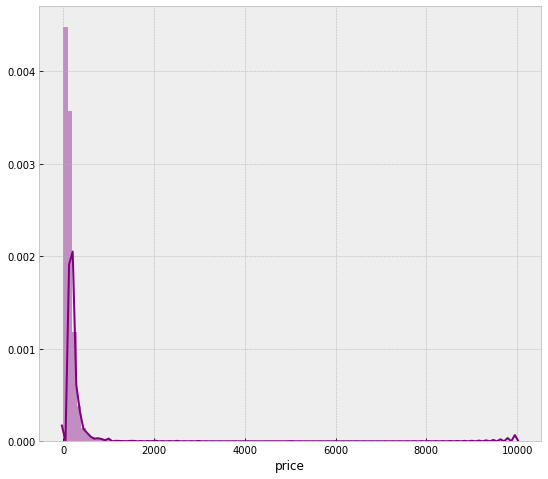

In [12]:
print(listings['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(listings['price'], color='purple', bins=100, hist_kws={'alpha': 0.4});

## continuous variables (stored as ints and floats)

In [13]:
list(set(listings.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

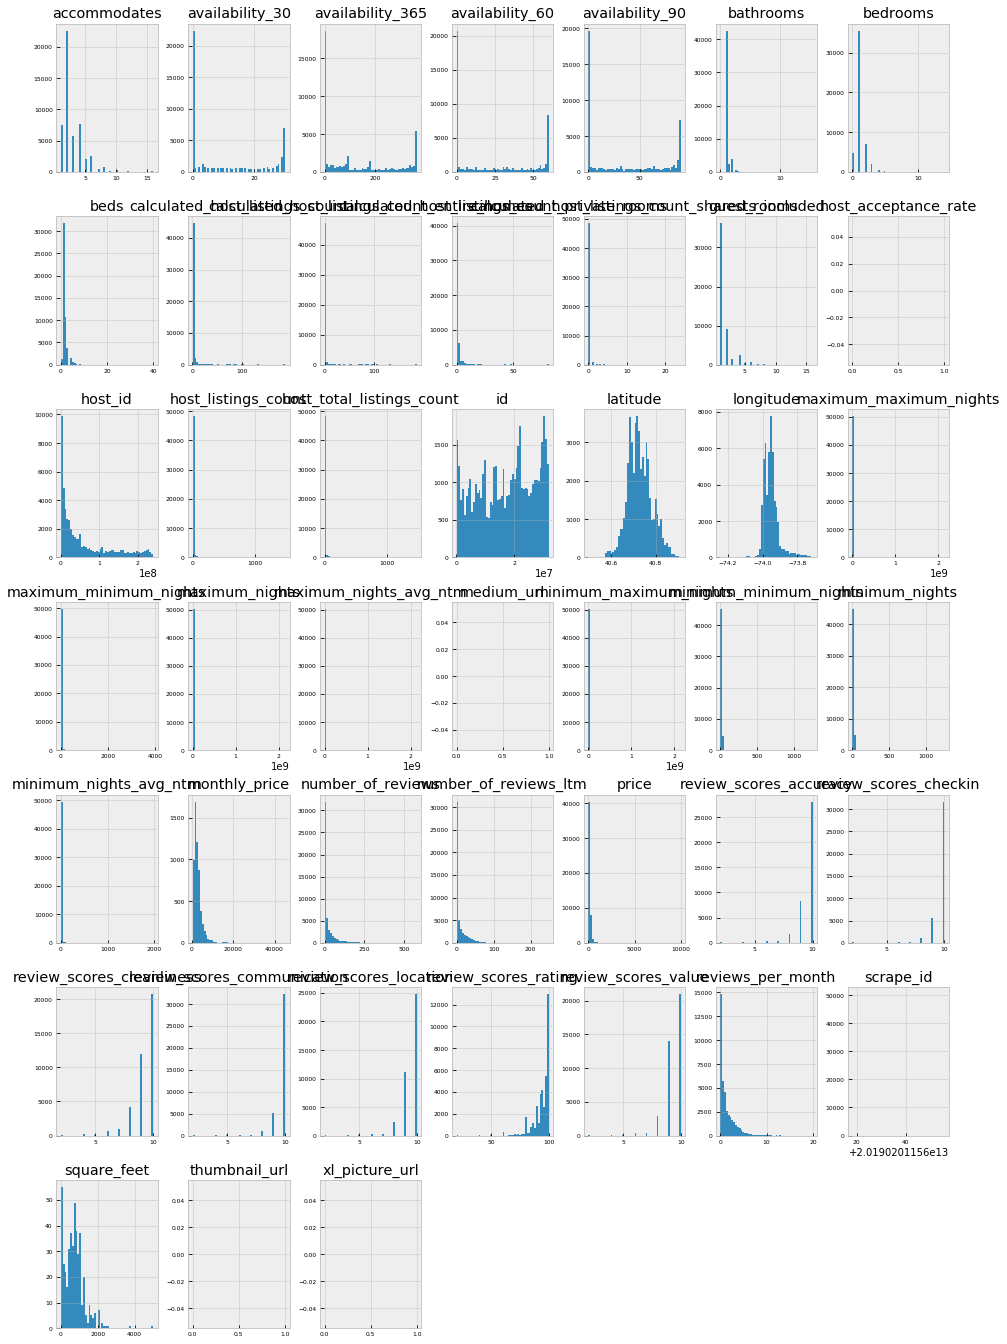

In [14]:
listings_num = listings.select_dtypes(include = ['float64', 'int64'])
listings_num.hist(figsize=(16, 24), bins=50, xlabelsize=6, ylabelsize=6);

In [ ]:
listings_num_corr = listings_num.corr()['price'] 
sorted(list(zip(listings_num, listings_num_corr)), key=lambda tup: tup[1])

[('id', -0.008672387238149618),
 ('scrape_id', 8.031832704513871e-15),
 ('thumbnail_url', nan),
 ('medium_url', nan),
 ('xl_picture_url', nan),
 ('longitude', -0.15647815404557122),
 ('calculated_host_listings_count_private_rooms', -0.07539189210727308),
 ('calculated_host_listings_count_shared_rooms', -0.043157128702799114),
 ('number_of_reviews_ltm', -0.0354859825822667),
 ('number_of_reviews', -0.03258905391036314),
 ('reviews_per_month', -0.024139316686913277),
 ('review_scores_value', -0.010880956061165037),
 ('review_scores_checkin', -0.008760928931378352),
 ('maximum_nights_avg_ntm', -0.00039940379014865814),
 ('maximum_maximum_nights', -0.00039939706915398295),
 ('host_id', 0.0003710296673431187),
 ('host_acceptance_rate', nan),
 ('minimum_maximum_nights', -0.00039944084087893727),
 ('maximum_nights', -0.00039938703962690735),
 ('review_scores_communication', 0.0023946219812795108),
 ('maximum_minimum_nights', 0.005325504546554181),
 ('review_scores_accuracy', 0.009818359060991

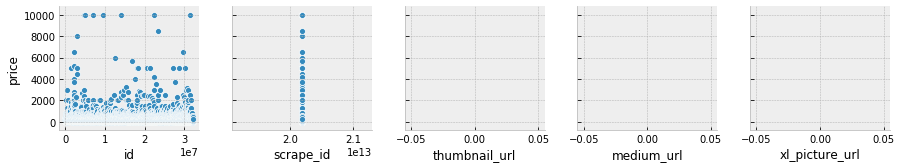

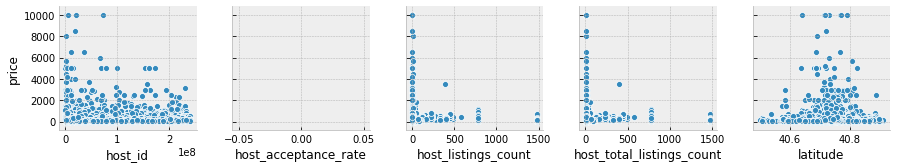

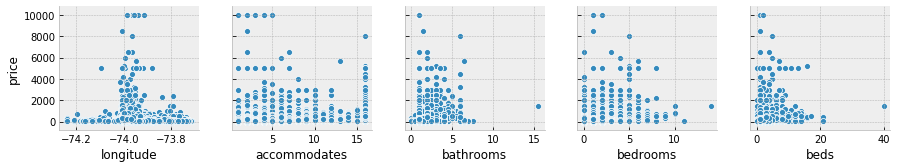

In [ ]:
for i in range(0, len(listings_num.columns), 5):
    sns.pairplot(data=listings_num,
                x_vars=listings_num.columns[i:i+5],
                y_vars=['price'])

/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


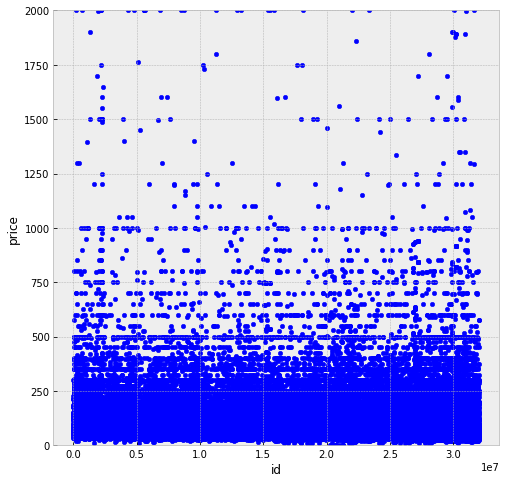

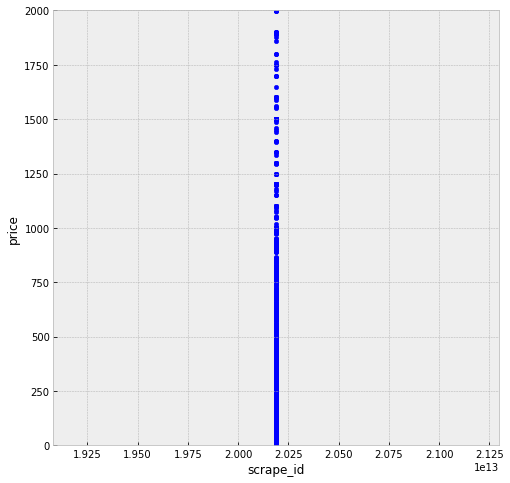

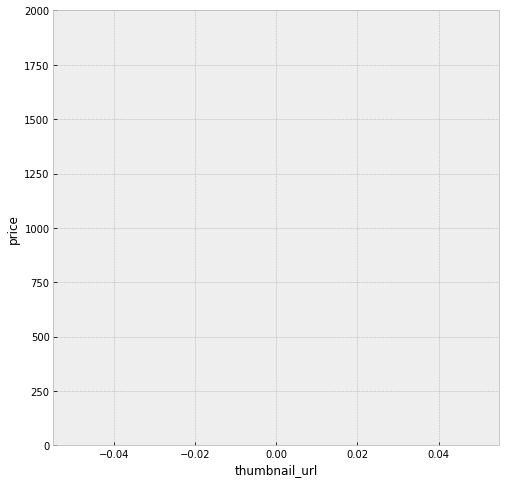

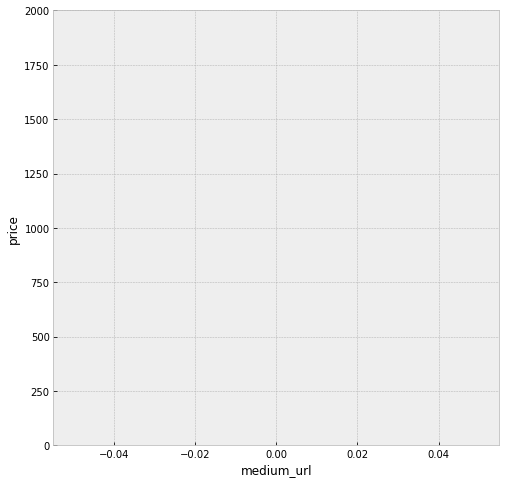

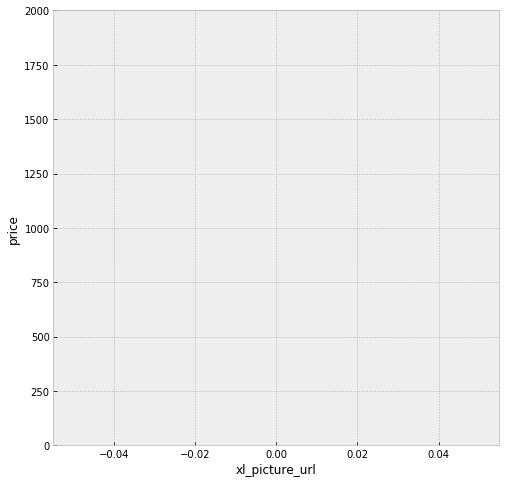

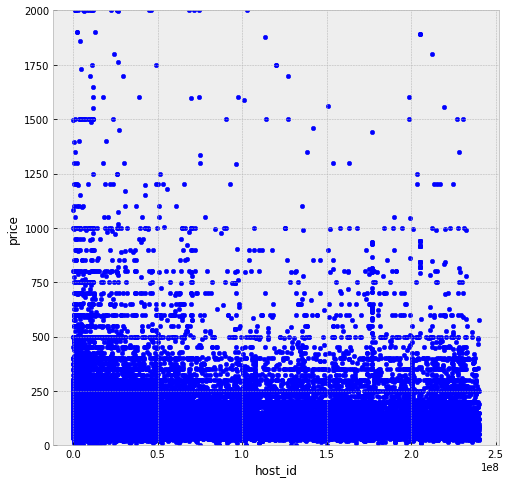

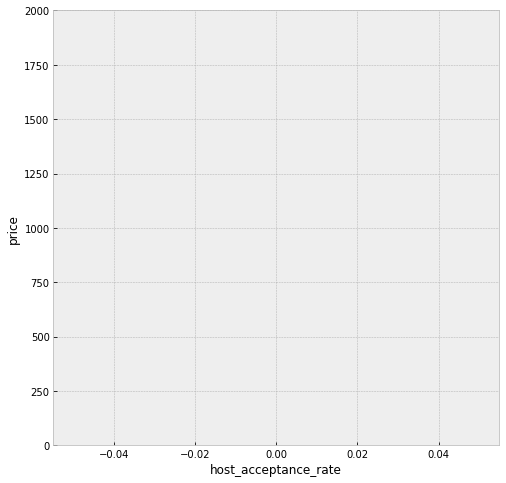

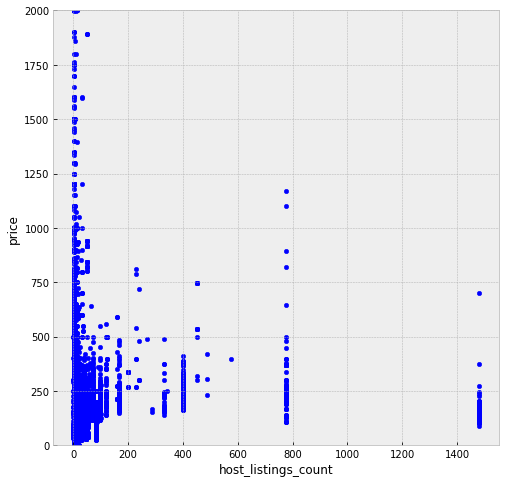

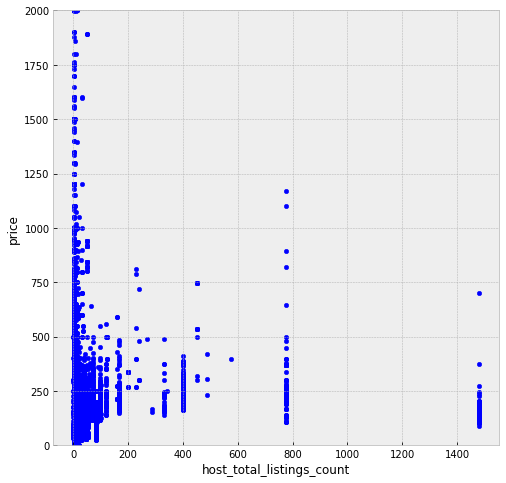

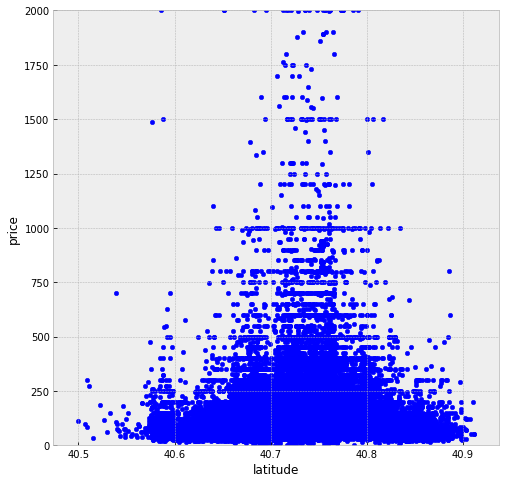

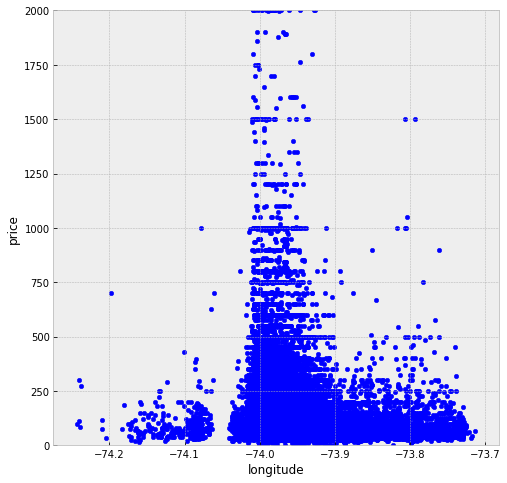

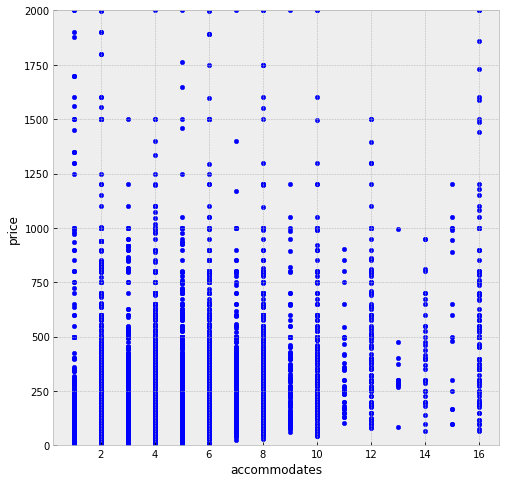

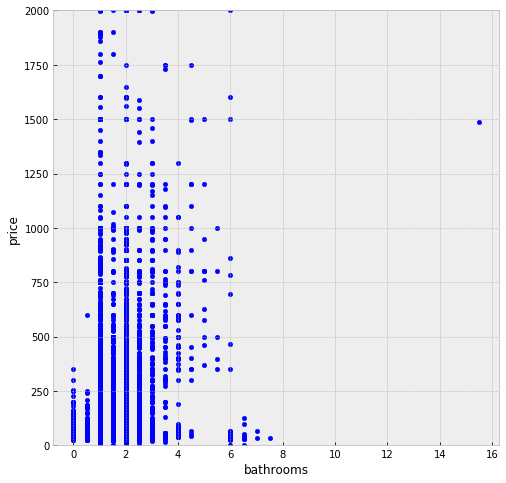

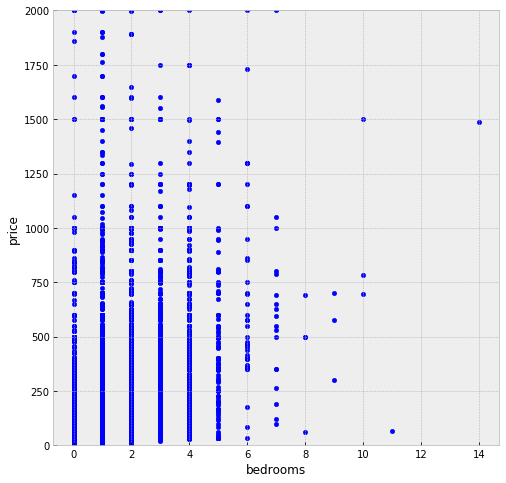

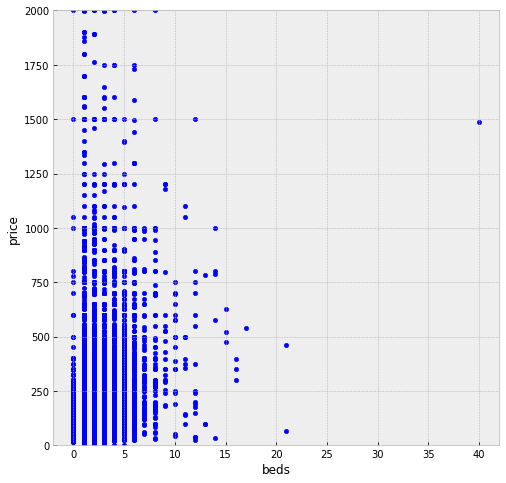

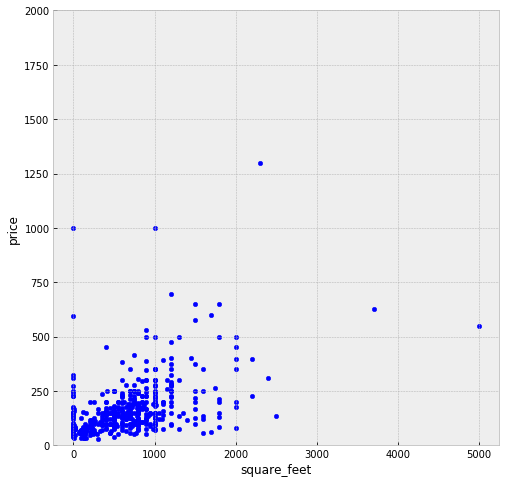

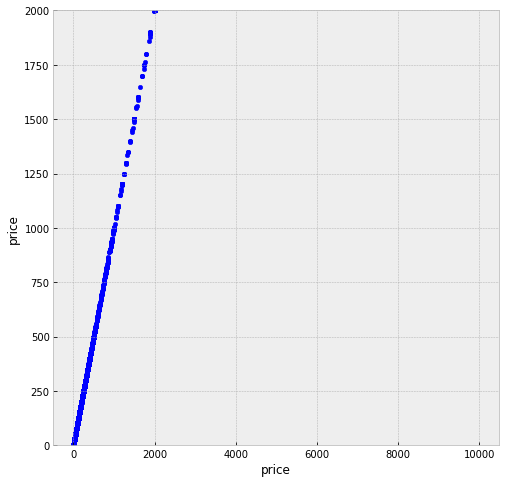

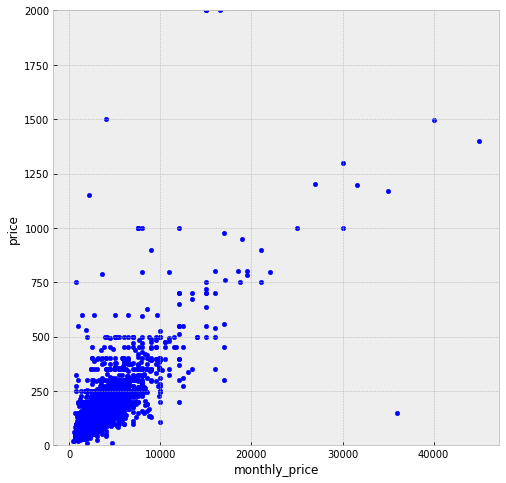

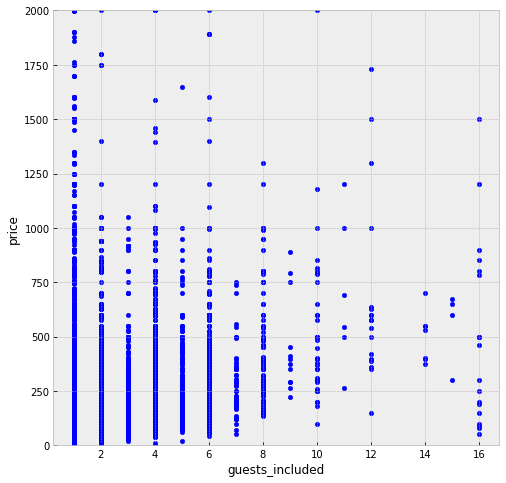

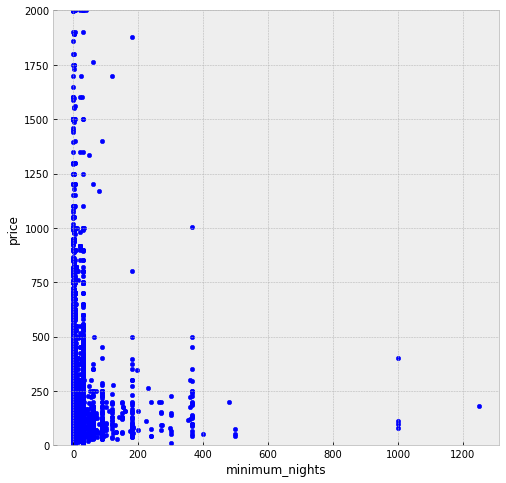

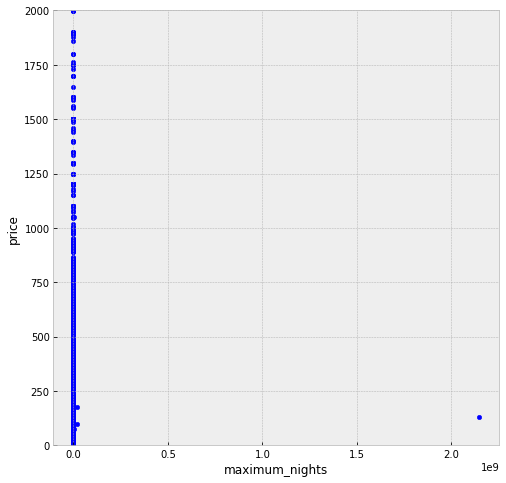

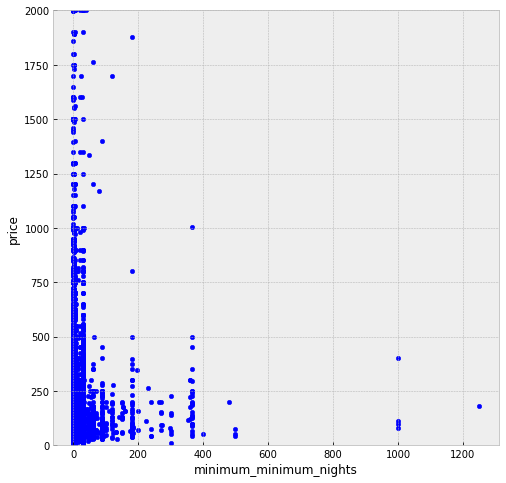

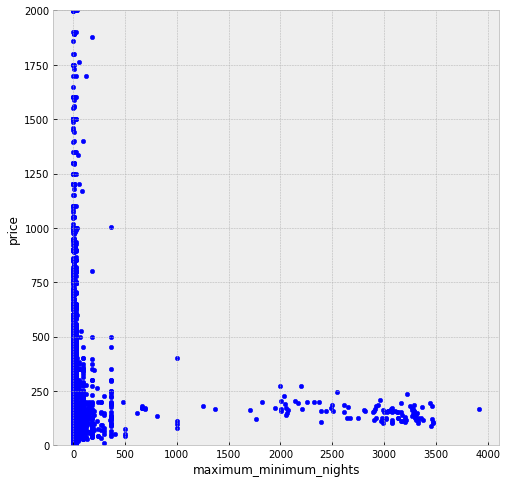

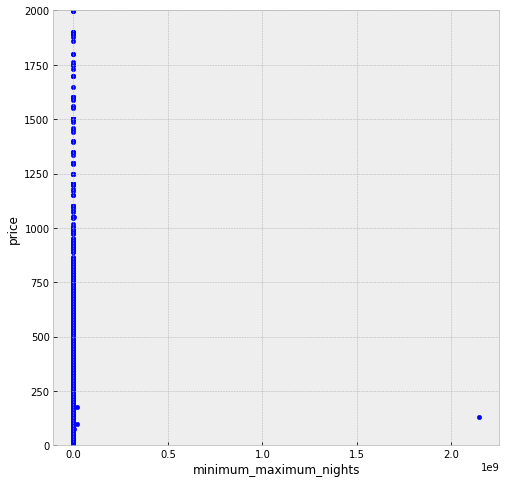

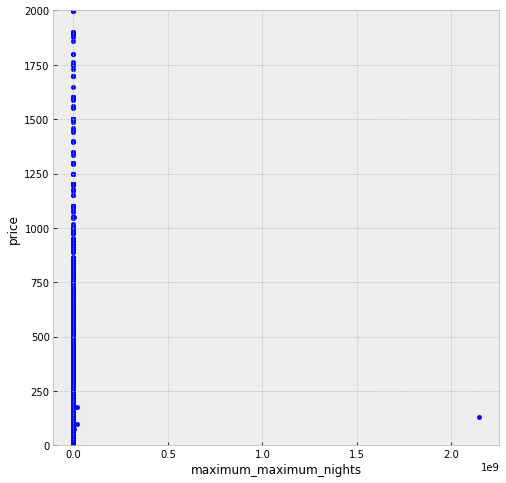

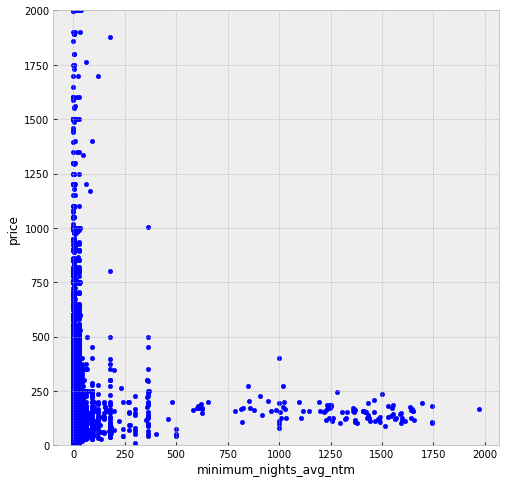

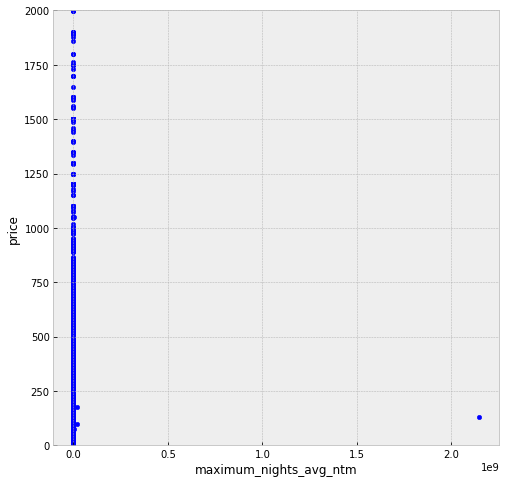

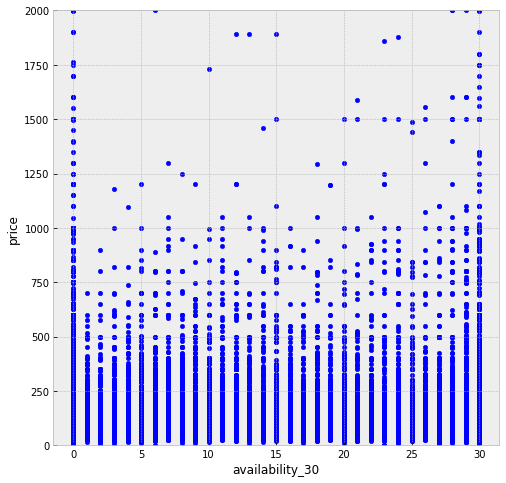

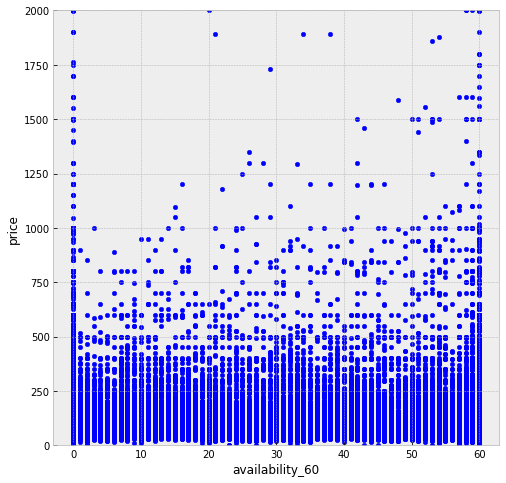

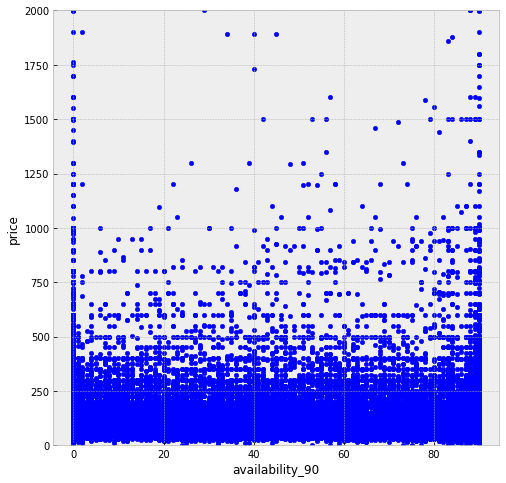

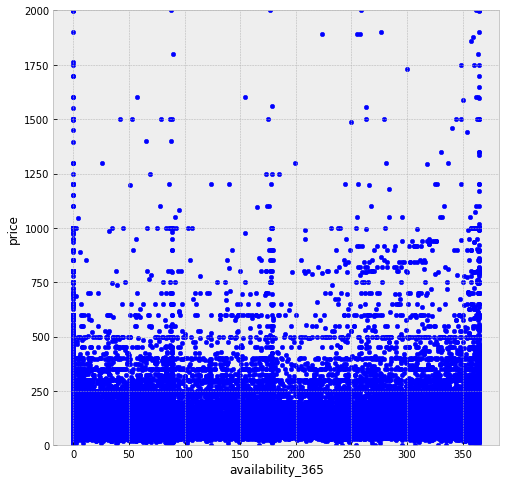

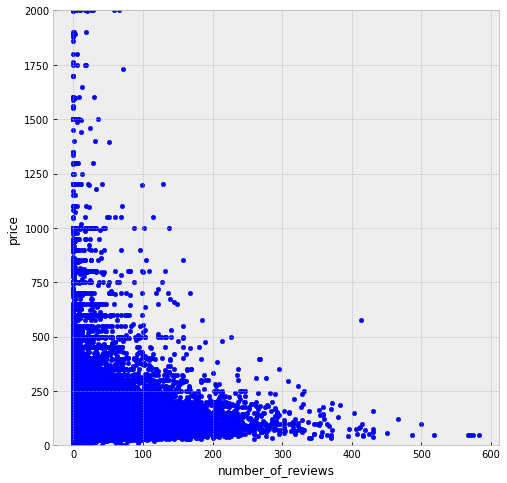

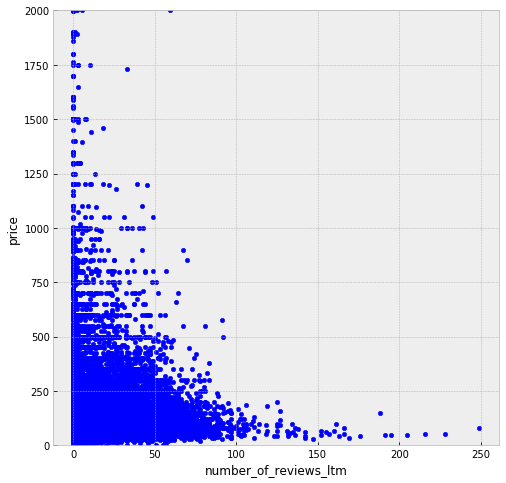

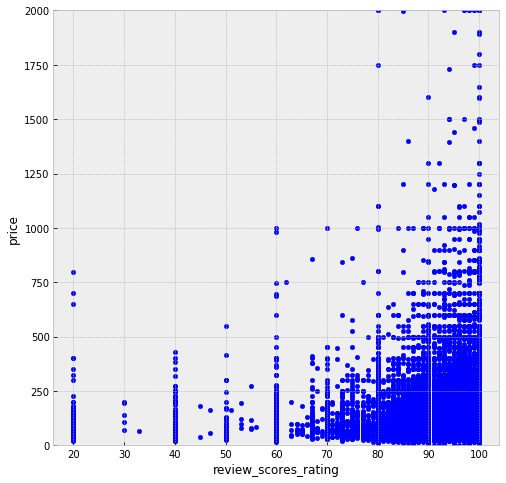

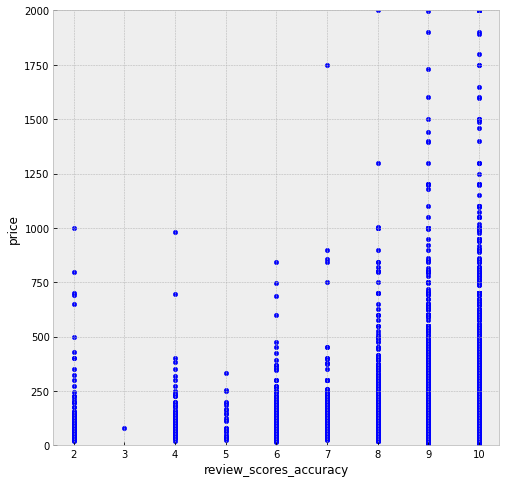

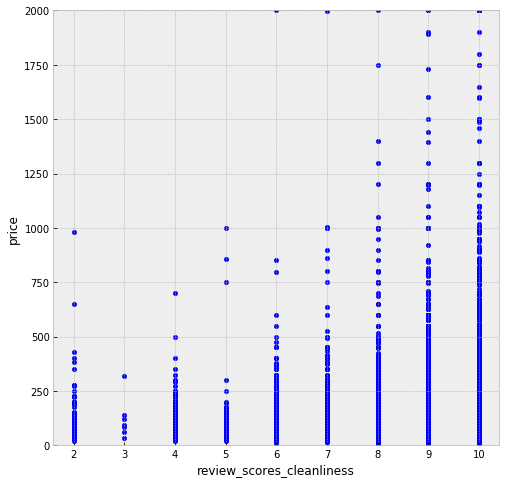

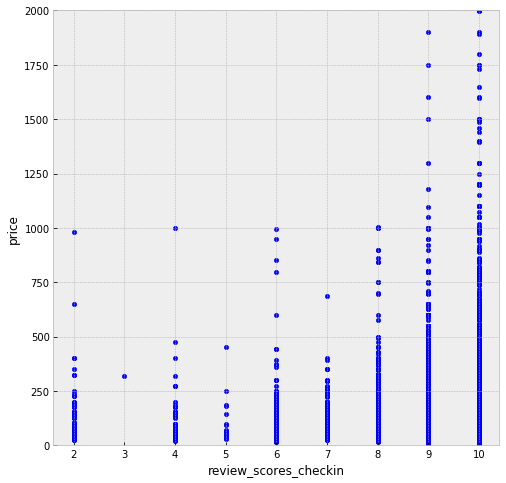

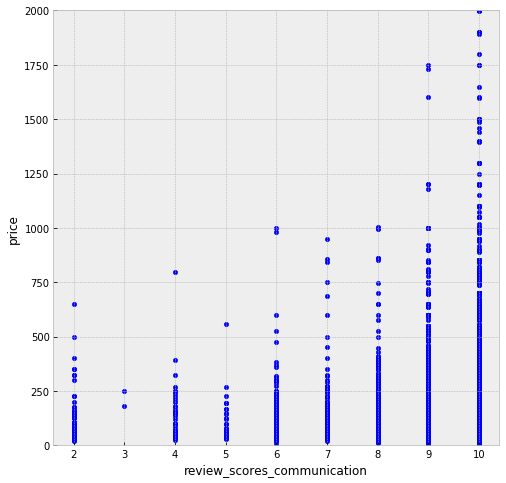

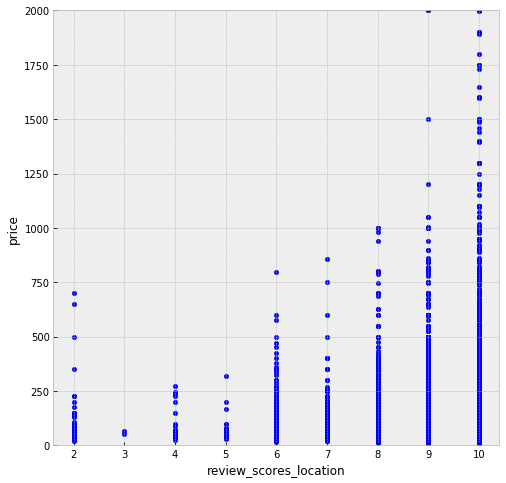

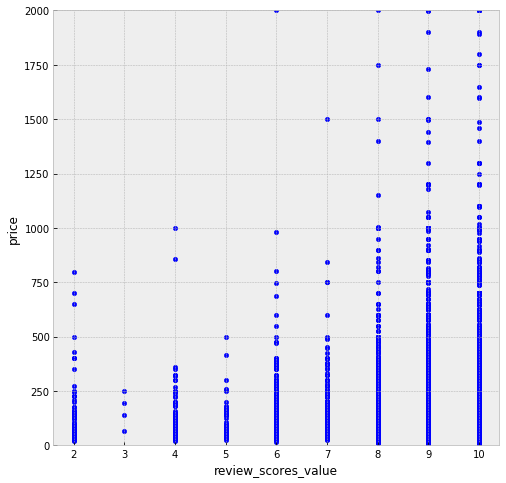

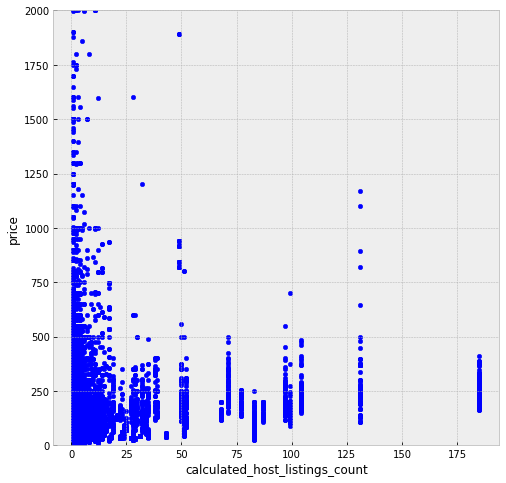

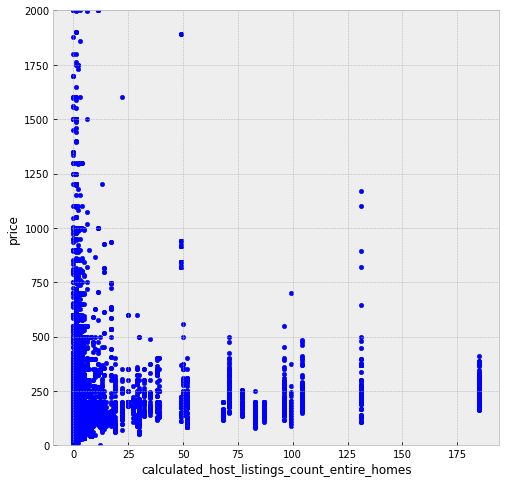

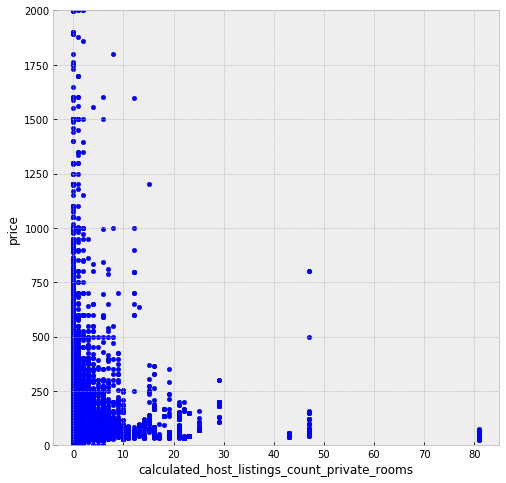

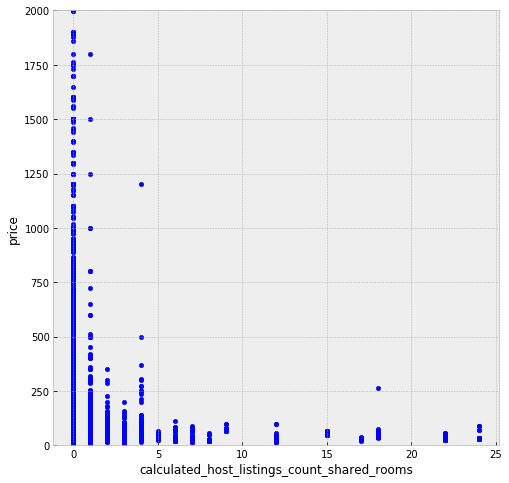

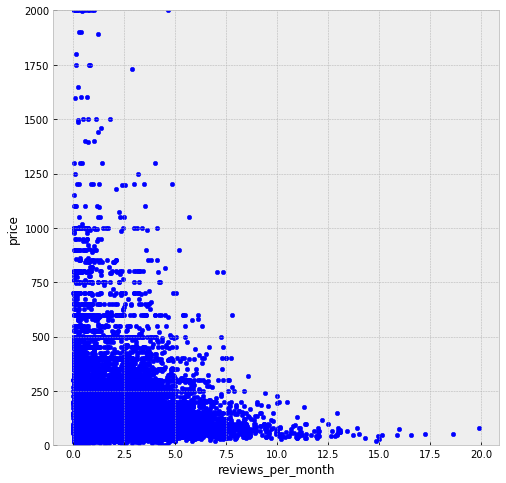

In [15]:
# same thing as above
for column_title in listings_num.columns:
    listings_num.plot.scatter(x=column_title, ylim=[0,2000],y='price', figsize = (8,8))

# Distribution of numerical variables

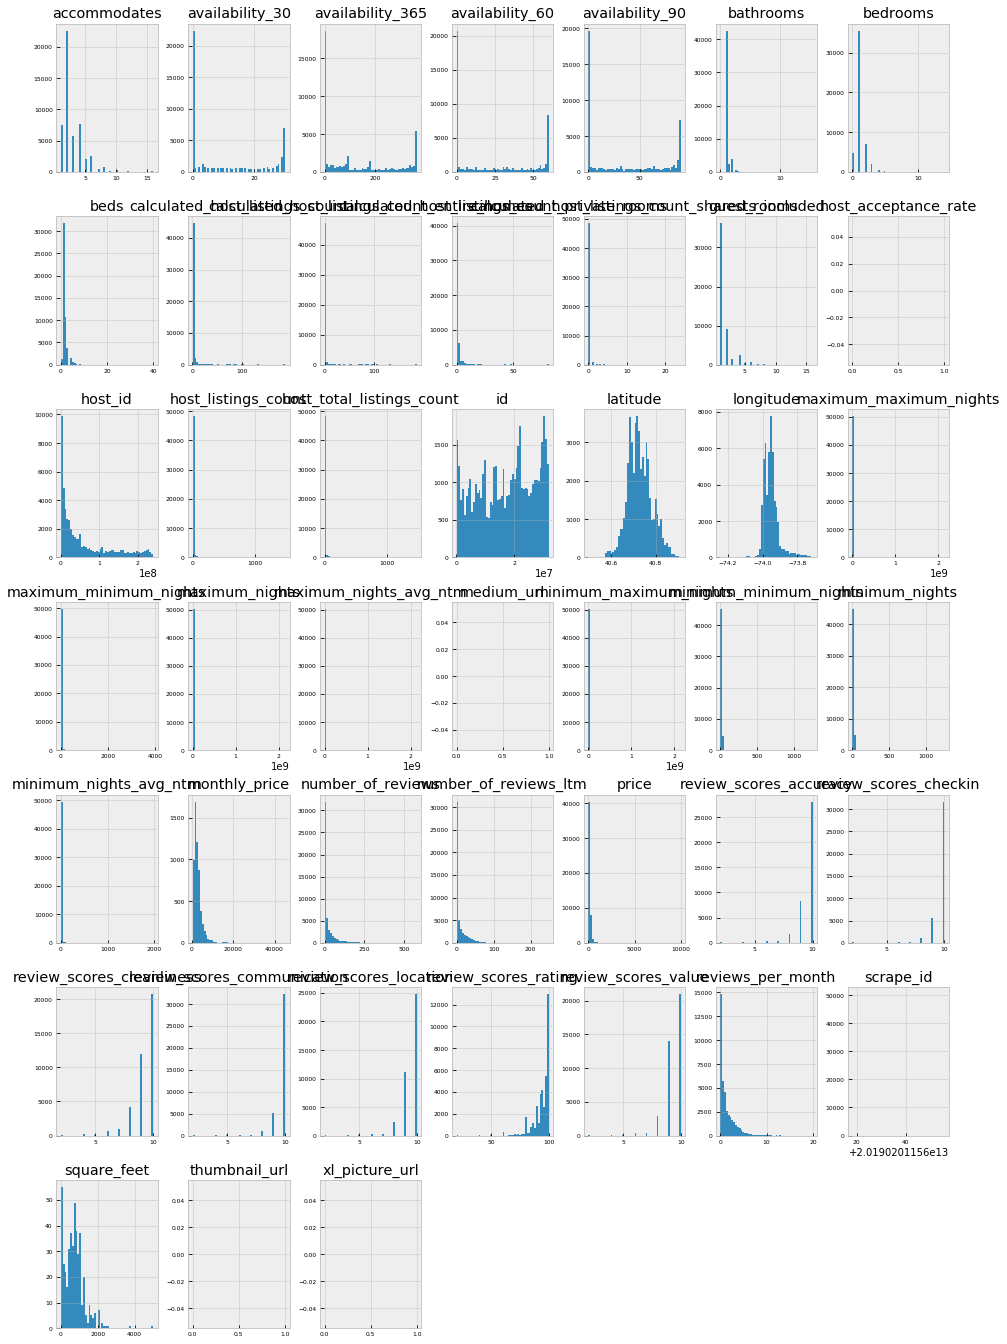

In [16]:
listings_num.hist(figsize=(16, 24), bins=50, xlabelsize=6, ylabelsize=6);

## Removing Price Outliers

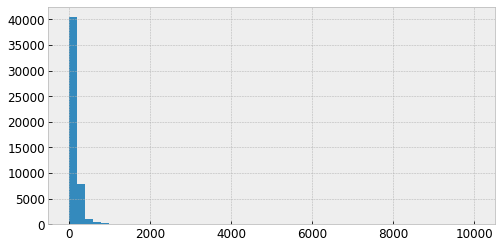

In [30]:
listings_num.price.hist(figsize=(8, 4), bins=50, xlabelsize=12, ylabelsize=12);

In [77]:
listings_num.price.describe()

count    50228.000000
mean       150.484889
std        225.907959
min          0.000000
25%         69.000000
50%        108.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [57]:
# Get names of indexes for which column Age has value 30
indexNames = listings_num[listings_num['price'] >= 1000].index
 
# Delete these row indexes from dataFrame
listings_num_removepriceoutliers = listings_num.drop(indexNames)

### how many were removed?

In [84]:
before = listings_num.price.count()
after = listings_num_removepriceoutliers.price.count()
print(before)
print(after)
print(f"number of price outliers removed = {before - after}")
print(f"% of price outliers removed = {(before - after)/(before/100)}")

50228
49953
number of price outliers removed = 275
% of price outliers removed = 0.5475033845663774


In [85]:
# Get names of indexes for which column Age has value 30
indexNames = listings_num[listings_num['price'] >= 600].index
listings_num_removepriceoutliers600 = listings_num.drop(indexNames)

In [87]:
before = listings_num.price.count()
after = listings_num_removepriceoutliers600.price.count()
print(before)
print(after)
print(f"number of price outliers removed = {before - after}")
print(f"% of price outliers removed = {(before - after)/(before/100)}%")

50228
49369
number of price outliers removed = 859
% of price outliers removed = 1.7102014812455206%


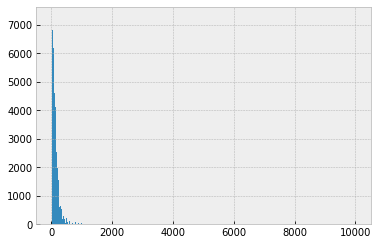

In [91]:
listings_num.price.hist(bins = 500)

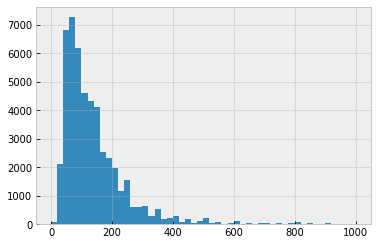

In [59]:
listings_num_removepriceoutliers.price.hist(bins = 50)

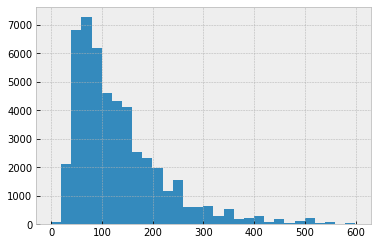

In [89]:
listings_num_removepriceoutliers600.price.hist(bins = 30)

In [79]:
listings_num_removepriceoutliers.price.count() - 

49953

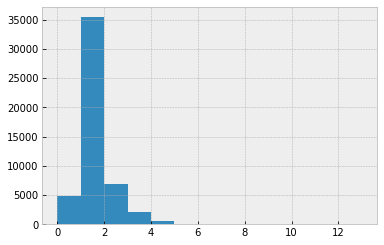

In [67]:
listings_num_removepriceoutliers.bedrooms.hist(bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13])

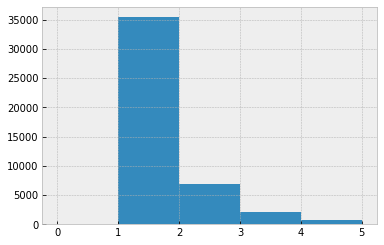

In [71]:
# Get names of indexes for which column Age has value 30
indexNames = listings_num_removepriceoutliers[listings_num_removepriceoutliers['bedrooms'] == 0].index
 
# Delete these row indexes from dataFrame
listings_num_removepriceoutliers_nobedrooms = listings_num_removepriceoutliers.drop(indexNames)
listings_num_removepriceoutliers_nobedrooms.bedrooms.hist(bins = [0,1,2,3,4,5])


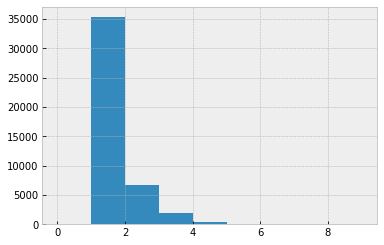

In [95]:

# Get names of indexes for which column Age has value 30
indexNames = listings_num_removepriceoutliers600[listings_num_removepriceoutliers600['bedrooms'] == 0].index
 
# Delete these row indexes from dataFrame
listings_num_removepriceoutliers600_no0bedrooms = listings_num_removepriceoutliers600.drop(indexNames)
listings_num_removepriceoutliers600_no0bedrooms.bedrooms.hist(bins = [0,1,2,3,4,5,6,7,8,9])



# Feature to feature correlations - Numerical Variables

In [72]:
listings_num_trimmed = listings_num.drop(columns = ['thumbnail_url', 'scrape_id','xl_picture_url','id','medium_url', 'host_acceptance_rate', 'review_scores_checkin','maximum_minimum_nights','review_scores_communication','review_scores_accuracy','host_id','maximum_maximum_nights','maximum_nights_avg_ntm', 'minimum_minimum_nights',
'minimum_nights_avg_ntm',"minimum_maximum_nights"], axis =1)                      

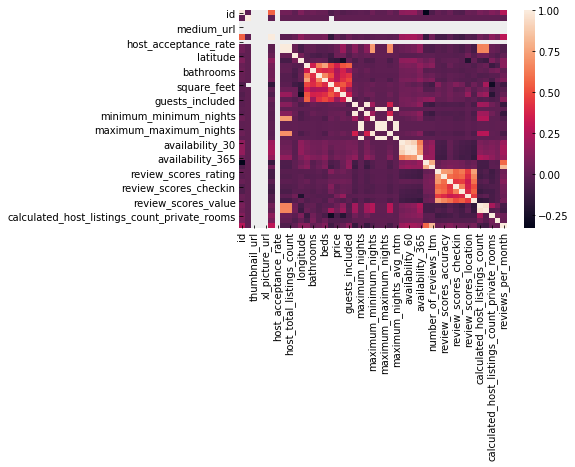

In [107]:
corr = listings_num.corr()
sns.heatmap(corr)

In [108]:
corr["price"].sort_values()

longitude                                      -1.564782e-01
calculated_host_listings_count_private_rooms   -7.539189e-02
calculated_host_listings_count_shared_rooms    -4.315713e-02
number_of_reviews_ltm                          -3.548598e-02
number_of_reviews                              -3.258905e-02
reviews_per_month                              -2.413932e-02
review_scores_value                            -1.088096e-02
review_scores_checkin                          -8.760929e-03
id                                             -8.672387e-03
minimum_maximum_nights                         -3.994408e-04
maximum_nights_avg_ntm                         -3.994038e-04
maximum_maximum_nights                         -3.993971e-04
maximum_nights                                 -3.993870e-04
scrape_id                                       8.031833e-15
host_id                                         3.710297e-04
review_scores_communication                     2.394622e-03
maximum_minimum_nights  

longitude                                      -2.736596e-01
calculated_host_listings_count_private_rooms   -1.447071e-01
calculated_host_listings_count_shared_rooms    -8.006433e-02
review_scores_value                            -2.758041e-02
number_of_reviews                              -2.539421e-02
number_of_reviews_ltm                          -2.519078e-02
reviews_per_month                              -2.094601e-02
id                                             -1.025814e-02
scrape_id                                      -1.359694e-14
minimum_maximum_nights                          1.373501e-04
maximum_nights_avg_ntm                          1.407706e-04
maximum_nights                                  1.419576e-04
maximum_maximum_nights                          1.443233e-04
host_id                                         3.251726e-03
review_scores_checkin                           3.623963e-03
maximum_minimum_nights                          1.210842e-02
review_scores_communicat

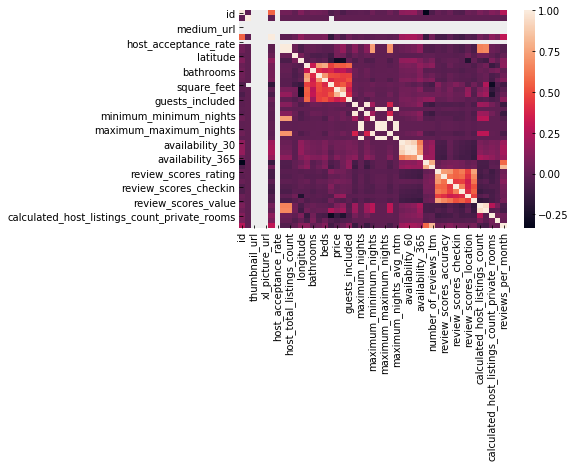

In [76]:
corr = listings_num_removepriceoutliers_nobedrooms.corr()
sns.heatmap(corr)
corr["price"].sort_values()

longitude                                      -2.938756e-01
calculated_host_listings_count_private_rooms   -1.635008e-01
calculated_host_listings_count_shared_rooms    -9.048037e-02
review_scores_value                            -2.751770e-02
number_of_reviews_ltm                          -2.628383e-02
reviews_per_month                              -2.605864e-02
id                                             -2.263119e-02
number_of_reviews                              -2.150921e-02
host_id                                        -1.909281e-02
minimum_maximum_nights                         -1.133578e-04
maximum_nights_avg_ntm                         -1.132968e-04
maximum_nights                                 -1.132778e-04
maximum_maximum_nights                         -1.132251e-04
scrape_id                                      -5.134069e-15
maximum_minimum_nights                          1.516156e-02
review_scores_checkin                           1.542014e-02
minimum_nights_avg_ntm  

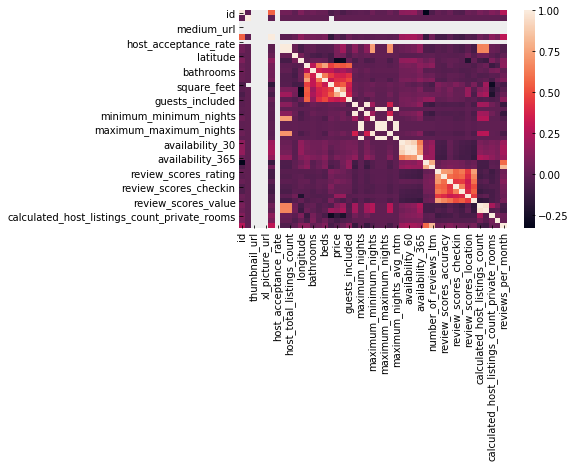

In [109]:
corr = listings_num_removepriceoutliers600.corr()
sns.heatmap(corr)
corr["price"].sort_values()

longitude                                      -2.704887e-01
calculated_host_listings_count_private_rooms   -1.396477e-01
calculated_host_listings_count_shared_rooms    -7.851827e-02
number_of_reviews_ltm                          -3.118353e-02
number_of_reviews                              -2.983759e-02
review_scores_value                            -2.475145e-02
reviews_per_month                              -2.392662e-02
id                                             -5.964990e-03
minimum_maximum_nights                         -3.823547e-04
maximum_nights_avg_ntm                         -3.823183e-04
maximum_nights                                 -3.822940e-04
maximum_maximum_nights                         -3.822816e-04
scrape_id                                       8.662528e-15
review_scores_checkin                           3.843223e-03
maximum_minimum_nights                          9.059668e-03
host_id                                         9.937498e-03
review_scores_communicat

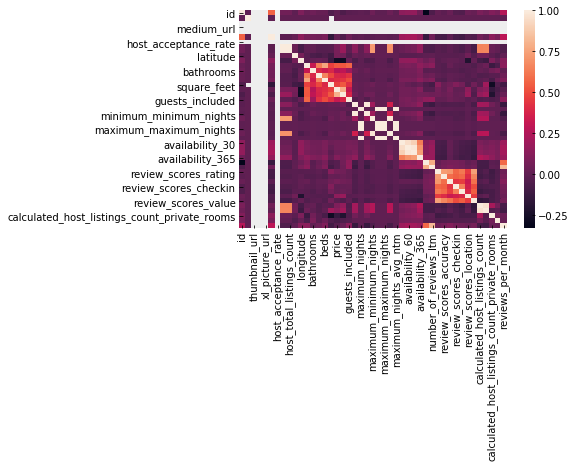

In [110]:
corr = listings_num_removepriceoutliers.corr()
sns.heatmap(corr)
corr["price"].sort_values()

longitude                                      -2.920877e-01
calculated_host_listings_count_private_rooms   -1.664316e-01
calculated_host_listings_count_shared_rooms    -9.150084e-02
review_scores_value                            -2.898243e-02
id                                             -2.431626e-02
reviews_per_month                              -2.385874e-02
number_of_reviews_ltm                          -2.125027e-02
host_id                                        -2.012062e-02
number_of_reviews                              -1.758615e-02
scrape_id                                      -1.582923e-14
minimum_maximum_nights                          6.738521e-04
maximum_nights_avg_ntm                          6.790829e-04
maximum_nights                                  6.795921e-04
maximum_maximum_nights                          6.851409e-04
review_scores_checkin                           1.616978e-02
maximum_minimum_nights                          1.835595e-02
availability_90         

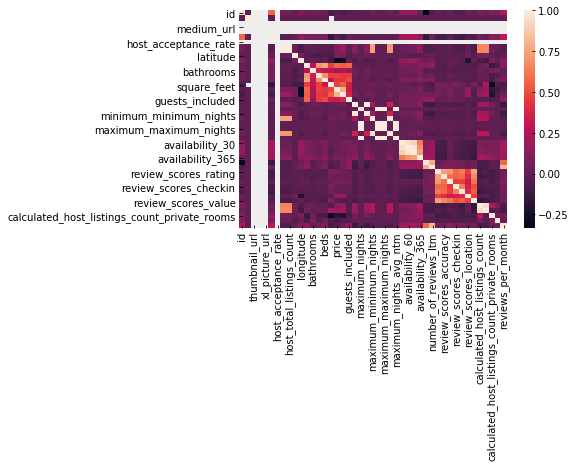

In [111]:
corr = listings_num_removepriceoutliers600_no0bedrooms.corr()
sns.heatmap(corr)
corr["price"].sort_values()

,accommodates,bedrooms,beds,price
accommodates,1.000000,0.728254,0.781368,0.557488
bedrooms,0.728254,1.000000,0.716567,0.492824
beds,0.781368,0.716567,1.000000,0.444921
price,0.557488,0.492824,0.444921,1.000000


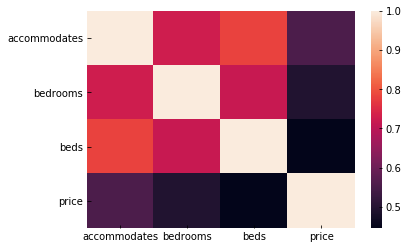

In [158]:
corr = listings_num_removepriceoutliers_nobedrooms[["accommodates","bedrooms","beds","price"]].corr()
sns.heatmap(corr)
corr

In [177]:
corr = listings_num_removepriceoutliers_nobedrooms.corr()
corr_tf = abs(corr) > 0.75

for column in corr_tf:
    for index in corr_tf.index:
        if (corr_tf[column][index] == True) & (index != column): 
            print(f"{column}, {index}")

host_listings_count, host_total_listings_count
host_total_listings_count, host_listings_count
accommodates, beds
beds, accommodates
price, monthly_price
monthly_price, price
minimum_nights, minimum_minimum_nights
maximum_nights, minimum_maximum_nights
maximum_nights, maximum_maximum_nights
maximum_nights, maximum_nights_avg_ntm
minimum_minimum_nights, minimum_nights
maximum_minimum_nights, minimum_nights_avg_ntm
minimum_maximum_nights, maximum_nights
minimum_maximum_nights, maximum_maximum_nights
minimum_maximum_nights, maximum_nights_avg_ntm
maximum_maximum_nights, maximum_nights
maximum_maximum_nights, minimum_maximum_nights
maximum_maximum_nights, maximum_nights_avg_ntm
minimum_nights_avg_ntm, maximum_minimum_nights
maximum_nights_avg_ntm, maximum_nights
maximum_nights_avg_ntm, minimum_maximum_nights
maximum_nights_avg_ntm, maximum_maximum_nights
availability_30, availability_60
availability_30, availability_90
availability_60, availability_30
availability_60, availability_90
availa

In [180]:
#  'review_scores_rating',
#  'review_scores_accuracy',
#  'review_scores_cleanliness',
#  'review_scores_checkin',
#  'review_scores_communication',
#  'review_scores_location',
#  'review_scores_value',
listings[[ 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,10.0,10.0,10.0,10.0,10.0,10.0
2,95.0,9.0,9.0,10.0,10.0,10.0,9.0
3,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,90.0,9.0,9.0,10.0,10.0,10.0,10.0
6,93.0,10.0,9.0,10.0,10.0,9.0,10.0
7,88.0,10.0,9.0,10.0,10.0,9.0,9.0
8,90.0,8.0,8.0,10.0,10.0,9.0,9.0
9,84.0,9.0,8.0,10.0,9.0,10.0,9.0


 # Quantitative  to  Quantitative

In [55]:
# fig, ax = plt.subplots(round(len(listings_num_trimmed) / 3), 3, figsize = (18, 12))

# for i, ax in enumerate(fig.axes):
#     if i < len(listings_num_trimmed.columns) - 1:
#         sns.regplot(x=listings_num_trimmed[i],y='price', data=listings_num_trimmed, ax=ax)

In [ ]:
2

# Linear Regression

## 1. all prices, all bedrooms

In [115]:
# price on accomdates = R2 = 0.128
def lr(dependent,independents, dataframe):
    f1 = f'{dependent}~{independents}'
    model1 = smf.ols(formula = f1, data = dataframe).fit()
    return model1.summary()


In [131]:
lr('price','accommodates', listings_num)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     7396.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:37:04   Log-Likelihood:            -3.4006e+05
No. Observations:               50228   AIC:                         6.801e+05
Df Residuals:                   50226   BIC:                         6.801e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       27.4092      1.713     16.002      0.000      24.052      30.766
accommodates    42.6020      0.495     85.997      0.000      41.631      43.573
==============================================================================
Omnibus:                   117296.603   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1586870314.942
Skew:                          23.139   Prob(JB):                         0.00
Kurtosis:                     872.539   Cond. No.                         6.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
lr('price','bedrooms', listings_num)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     3750.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:32:37   Log-Likelihood:            -3.4143e+05
No. Observations:               50185   AIC:                         6.829e+05
Df Residuals:                   50183   BIC:                         6.829e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.7882      1.799     32.119      0.000      54.262      61.315
bedrooms      78.3328      1.279     61.236      0.000      75.826      80.840
==============================================================================
Omnibus:                   113904.333   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1261388894.251
Skew:                          21.622   Prob(JB):                         0.00
Kurtosis:                     778.477   Cond. No.                         3.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
lr('price','accommodates+bedrooms', listings_num)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     2522.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:33:06   Log-Likelihood:            -3.3938e+05
No. Observations:               50147   AIC:                         6.788e+05
Df Residuals:                   50143   BIC:                         6.788e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       19.9314      1.854     10.749      0.000      16.297      23.566
accommodates    39.3878      0.785     50.148      0.000      37.848      40.927
bedrooms        18.4115      1.731     10.636      0.000      15.019      21.804
beds            -3.2943      1.392     -2.367      0.018      -6.022      -0.566
==============================================================================
Omnibus:                   117398.086   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1617237531.436
Skew:                          23.277   Prob(JB):                         0.00
Kurtosis:                     881.539   Cond. No.                         9.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
lr('price','beds', listings_num)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     4127.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:33:19   Log-Likelihood:            -3.4116e+05
No. Observations:               50185   AIC:                         6.823e+05
Df Residuals:                   50183   BIC:                         6.823e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.1825      1.668     37.882      0.000      59.913      66.452
beds          56.2740      0.876     64.240      0.000      54.557      57.991
==============================================================================
Omnibus:                   114447.417   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1317983374.554
Skew:                          21.864   Prob(JB):                         0.00
Kurtosis:                     795.709   Cond. No.                         3.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
lr('price','accommodates+bedrooms+beds', listings_num)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     2522.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:33:33   Log-Likelihood:            -3.3938e+05
No. Observations:               50147   AIC:                         6.788e+05
Df Residuals:                   50143   BIC:                         6.788e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       19.9314      1.854     10.749      0.000      16.297      23.566
accommodates    39.3878      0.785     50.148      0.000      37.848      40.927
bedrooms        18.4115      1.731     10.636      0.000      15.019      21.804
beds            -3.2943      1.392     -2.367      0.018      -6.022      -0.566
==============================================================================
Omnibus:                   117398.086   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1617237531.436
Skew:                          23.277   Prob(JB):                         0.00
Kurtosis:                     881.539   Cond. No.                         9.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## all prices under 600, no 0 bedrooms

In [157]:
lr('price','accommodates+bedrooms', listings_num_removepriceoutliers600_no0bedrooms)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                 1.109e+04
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:47:12   Log-Likelihood:            -2.5630e+05
No. Observations:               44589   AIC:                         5.126e+05
Df Residuals:                   44586   BIC:                         5.126e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.5278      0.811     43.815      0.000      33.938      37.117
accommodates    23.4209      0.281     83.275      0.000      22.870      23.972
bedrooms        22.2033      0.799     27.784      0.000      20.637      23.770
==============================================================================
Omnibus:                    13490.201   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52526.527
Skew:                           1.471   Prob(JB):                         0.00
Kurtosis:                       7.429   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## all prices under 1000, no 0 bedrooms

In [231]:
lr('price','accommodates+bedrooms+review_scores_checkin', listings_num_removepriceoutliers_nobedrooms)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     6905.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:49:29   Log-Likelihood:            -2.0590e+05
No. Observations:               35105   AIC:                         4.118e+05
Df Residuals:                   35101   BIC:                         4.118e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0574      6.336     -0.009      0.993     -12.476      12.361
accommodates             22.8602      0.357     64.017      0.000      22.160      23.560
bedrooms                 38.4314      1.038     37.033      0.000      36.397      40.465
review_scores_checkin     1.7173      0.642      2.677      0.007       0.460       2.975
==============================================================================
Omnibus:                    19348.351   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           283759.876
Skew:                           2.340   Prob(JB):                         0.00
Kurtosis:                      16.118   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
review_scores =  ['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

review_scores_string = '+'.join(review_scores)

lr('price','review_scores_checkin', listings_num_removepriceoutliers_nobedrooms)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4615
Date:                Thu, 07 Mar 2019   Prob (F-statistic):              0.497
Time:                        15:50:03   Log-Likelihood:            -2.1428e+05
No. Observations:               35145   AIC:                         4.286e+05
Df Residuals:                   35143   BIC:                         4.286e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               129.6986      7.897     16.423      0.000     114.220     145.177
review_scores_checkin     0.5494      0.809      0.679      0.497      -1.036       2.134
==============================================================================
Omnibus:                    21100.021   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239052.651
Skew:                           2.742   Prob(JB):                         0.00
Kurtosis:                      14.540   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

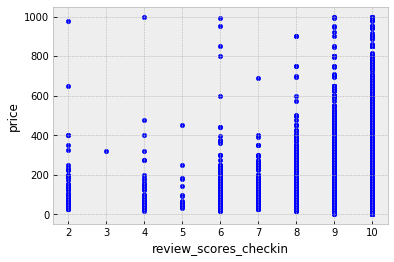

In [233]:
listings_num_removepriceoutliers_nobedrooms.plot.scatter(x="review_scores_checkin",y="price")

## creating interaction variables


### accommodates, bedrooms, review_scores_checkin

In [243]:
#accommodates+bedrooms+review_scores_checkin
def create_interaction_column(list_of_columns, df):
    df["new_column"] = df[list_of_columns[0]]
    for column in list_of_columns[1:]:
        df["new_column"] = df["new_column"] * df[column]
    df.rename(columns = {"new_column":"_".join(list_of_columns)}, inplace = True)  
#listings_num_removepriceoutliers["accommodates_bedrooms"] = listings_num_removepriceoutliers_nobedrooms[""]

In [244]:
create_interaction_column(["accommodates","bedrooms"], listings_num_removepriceoutliers_nobedrooms)

In [257]:
listings_num_removepriceoutliers_nobedrooms[['accommodates','bedrooms','review_scores_checkin','accommodates_bedrooms', 'accommodates_review_scores_checkin','bedrooms_review_scores_checkin','bedrooms_review_scores_checkin_accommodates']]
                                             

,accommodates,bedrooms,review_scores_checkin,accommodates_bedrooms,accommodates_review_scores_checkin,bedrooms_review_scores_checkin,bedrooms_review_scores_checkin_accommodates
1,4,1.0,10.0,4.0,40.0,10.0,40.0
3,2,1.0,10.0,2.0,20.0,10.0,20.0
4,2,1.0,NaN,2.0,NaN,NaN,NaN
5,3,1.0,10.0,3.0,30.0,10.0,30.0
6,1,NaN,10.0,NaN,10.0,NaN,NaN
7,2,1.0,10.0,2.0,20.0,10.0,20.0
8,2,1.0,10.0,2.0,20.0,10.0,20.0
9,2,1.0,10.0,2.0,20.0,10.0,20.0
10,1,1.0,10.0,1.0,10.0,10.0,10.0
11,4,NaN,9.0,NaN,36.0,NaN,NaN


In [261]:
print(listings_num_removepriceoutliers_nobedrooms.accommodates.count())
print(listings_num_removepriceoutliers_nobedrooms['review_scores_checkin'].count())
listings_num_removepriceoutliers_nobedrooms['bedrooms_review_scores_checkin_accommodates'].count()

45166
35145


35105

In [251]:
listings_num_removepriceoutliers_nobedrooms.columns

Index(['id', 'scrape_id', 'thumbnail_url', 'medium_url', 'xl_picture_url',
       'host_id', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_li

In [247]:
create_interaction_column(["accommodates","review_scores_checkin"], listings_num_removepriceoutliers_nobedrooms)

In [249]:
create_interaction_column(["bedrooms","review_scores_checkin"], listings_num_removepriceoutliers_nobedrooms)

In [250]:
create_interaction_column(["bedrooms","review_scores_checkin", "accommodates"], listings_num_removepriceoutliers_nobedrooms)

In [ ]:
# 'accommodates_bedrooms', 'accommodates_review_scores_checkin',
#        'bedrooms_review_scores_checkin',
#        'bedrooms_review_scores_checkin_accommodates']


 


In [256]:
lr("price","accommodates+bedrooms+review_scores_checkin+bedrooms_review_scores_checkin",listings_num_removepriceoutliers_nobedrooms  )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     5184.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:29:14   Log-Likelihood:            -2.0590e+05
No. Observations:               35105   AIC:                         4.118e+05
Df Residuals:                   35100   BIC:                         4.118e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -45.2844     13.685     -3.309      0.001     -72.108     -18.461
accommodates                      22.8843      0.357     64.086      0.000      22.184      23.584
bedrooms                          72.8990      9.303      7.836      0.000      54.665      91.133
review_scores_checkin              6.3685      1.403      4.540      0.000       3.619       9.118
bedrooms_review_scores_checkin    -3.5514      0.953     -3.728      0.000      -5.419      -1.684
==============================================================================
Omnibus:                    19323.869   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           284044.230
Skew:                           2.335   Prob(JB):                         0.00
Kurtosis:                      16.129   Cond. No.                         615.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Categorical Variables

In [223]:
listings_cat = listings.select_dtypes(exclude = ['float64', 'int64'])

In [224]:
listings_cat.columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'licen

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2454,https://www.airbnb.com/rooms/2454,20190201155637,2019-02-01,superCondo,"Great light, exposed brick and 10 feet high ce...","A fully renovated, West Elm furnished Condo, w...","Great light, exposed brick and 10 feet high ce...",none,Turtle bay neighborhood in the heart of midtow...,...,f,f,flexible,f,f,1,1,0,0,1.00
1,2539,https://www.airbnb.com/rooms/2539,20190201155637,2019-02-02,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,8,0,5,3,0.23
2,2595,https://www.airbnb.com/rooms/2595,20190201155637,2019-02-02,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
3,3330,https://www.airbnb.com/rooms/3330,20190201155637,2019-02-02,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,0.35
4,3647,https://www.airbnb.com/rooms/3647,20190201155637,2019-02-02,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
5,3831,https://www.airbnb.com/rooms/3831,20190201155637,2019-02-02,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.37
6,5022,https://www.airbnb.com/rooms/5022,20190201155637,2019-02-02,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.11
7,5099,https://www.airbnb.com/rooms/5099,20190201155637,2019-02-01,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.59
8,5121,https://www.airbnb.com/rooms/5121,20190201155637,2019-02-02,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.42
9,5178,https://www.airbnb.com/rooms/5178,20190201155637,2019-02-01,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,3.46
